In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR #支持向量回歸
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [2]:
data = pd.read_excel("SUM-CrCoNi.xlsx")

# Preparing the data
X = data[['x', 'y', 'z']]  # Input features
y = data['stress']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the SVR model
svr_model = SVR()

# Parameters for GridSearchCV
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3,]
}

# Applying GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model after grid search
best_model = grid_search.best_estimator_

# Predicting using the model
y_pred = best_model.predict(X_test_scaled)

In [3]:
# Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Explained Variance Score (EVS):", evs)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())  # Print the first few actual and predicted values

Mean Squared Error (MSE): 0.1782890654821211
Mean Absolute Error (MAE): 0.3381352925244784
Root Mean Squared Error (RMSE): 0.42224289867577536
R-squared (R2): 0.9422338142560316
Explained Variance Score (EVS): 0.9424869777451251
       Actual  Predicted
33   4.648690   4.985996
36   8.379397   8.203323
4   10.002850  10.178366
13   7.417313   6.639853
30   5.762056   5.961442


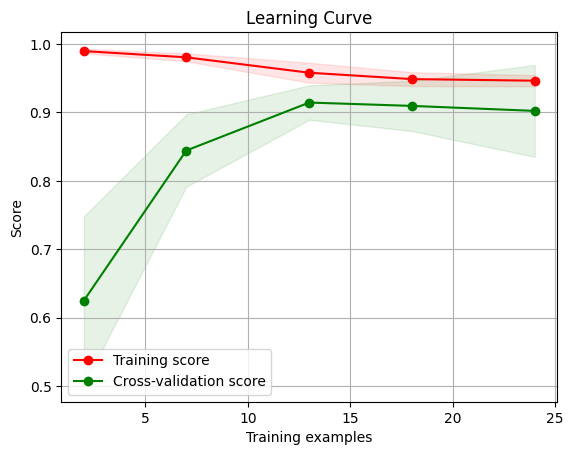

In [4]:

# Generating learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5),
    scoring='r2'  # Using R2 score for learning curve
)

# Calculating mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Filling the area between the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plotting the learning curve for the training and testing scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


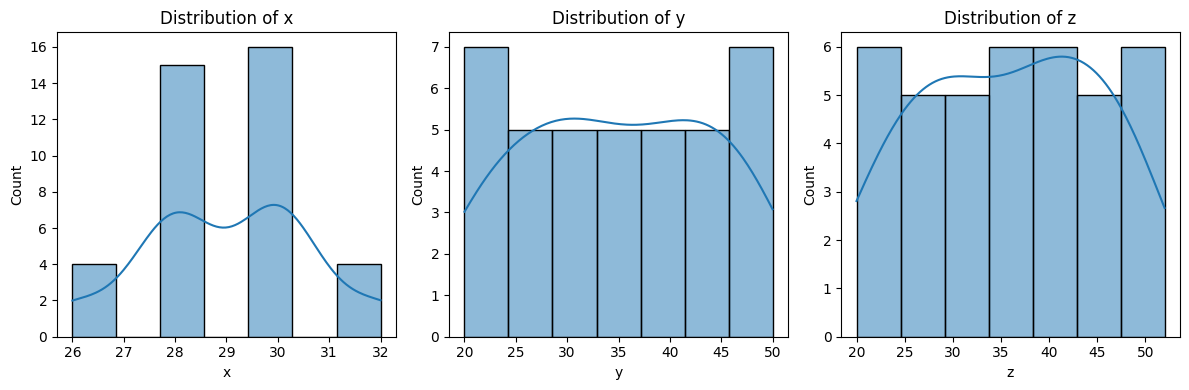

In [5]:
# 特徵分布圖
plt.figure(figsize=(12, 4))
for i, col in enumerate(['x', 'y', 'z']):
    plt.subplot(1, 3, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

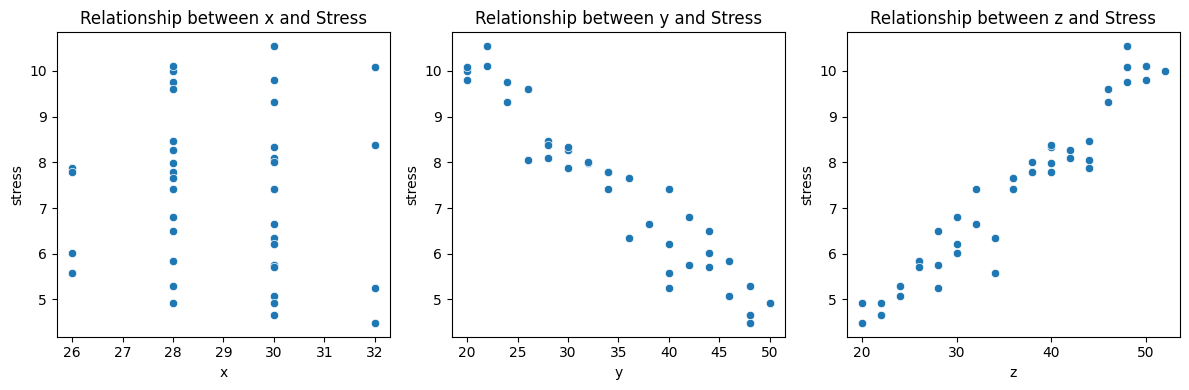

In [6]:
# 特徵與目標變量關係圖
plt.figure(figsize=(12, 4))
for i, col in enumerate(['x', 'y', 'z']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'Relationship between {col} and Stress')
plt.tight_layout()
plt.show()

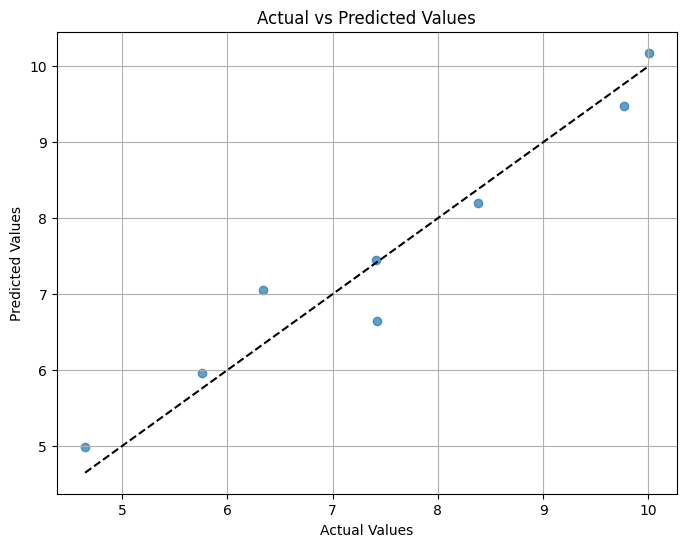

In [7]:
# 實際值與預測值比較圖
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line
plt.grid(True)
plt.show()

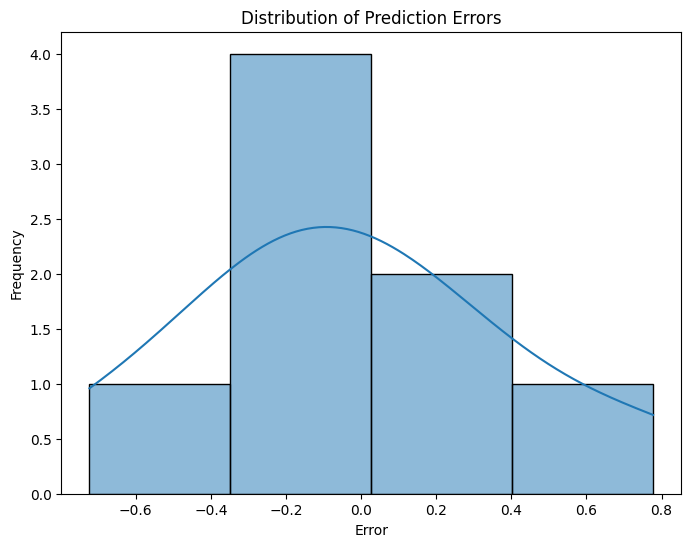

In [8]:
# 誤差分布圖
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()